# Clustering

A pergunta que queremos responder é:

Como as avaliações de hospedagens agrupam os anúncios delas e quais são as características comuns das propriedades com classificações altas e baixas?

## Pré-processamento

In [14]:
import pandas as pd

ds_path = 'data/rio_listings.csv'

df = pd.read_csv(ds_path, sep = ',')#, encoding='latin-1')
#df.dropna(axis=1)
df.describe()

,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.600800e+04,3.600800e+04,0.0,3.600800e+04,35999.000000,35999.000000,0.0,36008.000000,36008.000000,36008.000000,...,25721.000000,25723.000000,25722.000000,25722.000000,0.0,36008.000000,36008.000000,36008.000000,36008.000000,25706.000000
mean,4.445730e+17,2.023123e+13,NaN,1.784179e+08,17.221728,28.521237,NaN,-22.967580,-43.249377,4.071956,...,4.881911,4.868024,4.858699,4.701961,NaN,9.493224,8.647634,0.724228,0.114613,1.046277
std,4.418582e+17,0.000000e+00,NaN,1.769684e+08,95.150438,141.409181,NaN,0.034687,0.099241,2.358069,...,0.320784,0.340892,0.322370,0.442303,NaN,25.677082,25.412461,1.889419,0.985128,1.157816
min,1.787800e+04,2.023123e+13,NaN,1.671000e+03,1.000000,1.000000,NaN,-23.073276,-43.723009,1.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.863794e+07,2.023123e+13,NaN,2.416786e+07,1.000000,1.000000,NaN,-22.984712,-43.306566,2.000000,...,4.890000,4.870000,4.850000,4.620000,NaN,1.000000,1.000000,0.000000,0.000000,0.200000
50%,5.761368e+17,2.023123e+13,NaN,9.644573e+07,2.000000,3.000000,NaN,-22.972860,-43.194825,4.000000,...,5.000000,5.000000,4.970000,4.820000,NaN,2.000000,1.000000,0.000000,0.000000,0.670000
75%,8.726761e+17,2.023123e+13,NaN,3.256093e+08,6.000000,8.000000,NaN,-22.956277,-43.185573,5.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,3.000000,1.000000,0.000000,1.500000
max,1.053823e+18,2.023123e+13,NaN,5.527145e+08,1405.000000,1927.000000,NaN,-22.749690,-43.104400,16.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,185.000000,185.000000,21.000000,19.000000,13.750000


Apenas colunas relacionadas à avaliações

In [15]:
reviews_data_cols = ['id', 'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

In [16]:
reviews_df  = df.loc[:, reviews_data_cols]
reviews_df.describe()

,id,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3.600800e+04,36008.000000,36008.000000,36008.000000,25725.000000,25722.000000,25723.000000,25721.000000,25723.000000,25722.000000,25722.000000,25706.000000
mean,4.445730e+17,19.545545,7.117307,0.437986,4.785622,4.804016,4.745078,4.881911,4.868024,4.858699,4.701961,1.046277
std,4.418582e+17,40.600380,11.662121,1.030319,0.397027,0.393640,0.440203,0.320784,0.340892,0.322370,0.442303,1.157816
min,1.787800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2.863794e+07,0.000000,0.000000,0.000000,4.730000,4.770000,4.670000,4.890000,4.870000,4.850000,4.620000,0.200000
50%,5.761368e+17,4.000000,2.000000,0.000000,4.910000,4.930000,4.890000,5.000000,5.000000,4.970000,4.820000,0.670000
75%,8.726761e+17,20.000000,9.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.500000
max,1.053823e+18,638.000000,124.000000,14.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,13.750000


- **number_of_reviews**: O número de avaliações por anúncio varia de 0 a 638, com uma média de aproximadamente 19.55 e um desvio padrão de 40.60. Isto sugere que, embora a maioria dos anúncios tenha relativamente poucas avaliações, há alguns poucod com um número significativamente maior de avaliações.

- **number_of_reviews_l30d**: Representa o número de avaliações nos últimos 30 dias. A média é bastante baixa, 0.44, com um desvio padrão de 1.03, indicando que muitos anúncios podem não receber avaliações frequentes. De fato, a média de reviews_per_month é de 1.05, o que indica que a maior parte dos anúncios recebe apenas um review por mês.

Para realizar o agrupamento, vamos pegar apenas as colunas que possuem pontuações à respeito de características dos anúncios

In [17]:
clustering_df = reviews_df[['id','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value']]

Como review_score_rating representa uma média dos outros valores, vamos remover esta coluna.

In [18]:
clustering_df.drop(columns=['id', 'review_scores_rating'], axis=1, inplace=True)
clustering_df

/tmp/ipykernel_460257/2807736678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df.drop(columns=['id', 'review_scores_rating'], axis=1, inplace=True)


,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.77,4.65,4.83,4.91,4.77,4.67
1,4.70,4.79,4.81,4.92,4.84,4.60
2,4.93,4.93,4.97,4.95,4.94,4.89
3,3.88,4.25,4.69,4.56,4.44,4.38
4,4.72,4.46,4.83,4.77,4.83,4.59
...,...,...,...,...,...,...
36003,NaN,NaN,NaN,NaN,NaN,NaN
36004,NaN,NaN,NaN,NaN,NaN,NaN
36005,NaN,NaN,NaN,NaN,NaN,NaN
36006,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
all_nan_rows = clustering_df[clustering_df.isnull().all(axis=1)]
len(all_nan_rows)

10284

In [35]:
any_nan_rows = clustering_df[clustering_df.isnull().any(axis=1)]
print(len(any_nan_rows) - len(all_nan_rows)) 

6


Temos 10284 linhas completamente vazias e 6 linhas que possuem alguma das avaliações vazias. As linhas completamente vazias representam anúncios que não possuem avaliações, logo não é possível inferir notas para realizar imputação de dados. Além disso, como o número de hospedagens com alguma das avaliações faltantes é muito baixo (6), não é vantajoso utilizar imputação.

Removendo linhas vazias

In [37]:
clustering_df.dropna(inplace=True)
clustering_df

/tmp/ipykernel_460257/3497253657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df.dropna(inplace=True)


,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.77,4.65,4.83,4.91,4.77,4.67
1,4.70,4.79,4.81,4.92,4.84,4.60
2,4.93,4.93,4.97,4.95,4.94,4.89
3,3.88,4.25,4.69,4.56,4.44,4.38
4,4.72,4.46,4.83,4.77,4.83,4.59
...,...,...,...,...,...,...
35705,5.00,5.00,5.00,5.00,5.00,5.00
35755,5.00,5.00,5.00,5.00,5.00,5.00
35877,5.00,5.00,5.00,5.00,5.00,5.00
35995,5.00,5.00,5.00,5.00,5.00,5.00


In [39]:
clustering_df.describe()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000
mean,4.804024,4.745106,4.882014,4.867998,4.858677,4.701915
std,0.393633,0.440100,0.320297,0.340920,0.322390,0.442322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.770000,4.670000,4.890000,4.870000,4.850000,4.620000
50%,4.930000,4.890000,5.000000,5.000000,4.970000,4.820000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Agrupamento

Como o dataset tem poucas amostras de reviews, vamos utilizar um algoritmo aglomerativo hierárquico.

In [51]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import sys
import seaborn as sns

In [45]:
sys.setrecursionlimit(30000)

In [46]:
scaler = StandardScaler()
clustering_df_scaled = scaler.fit_transform(clustering_df)

Dendograma

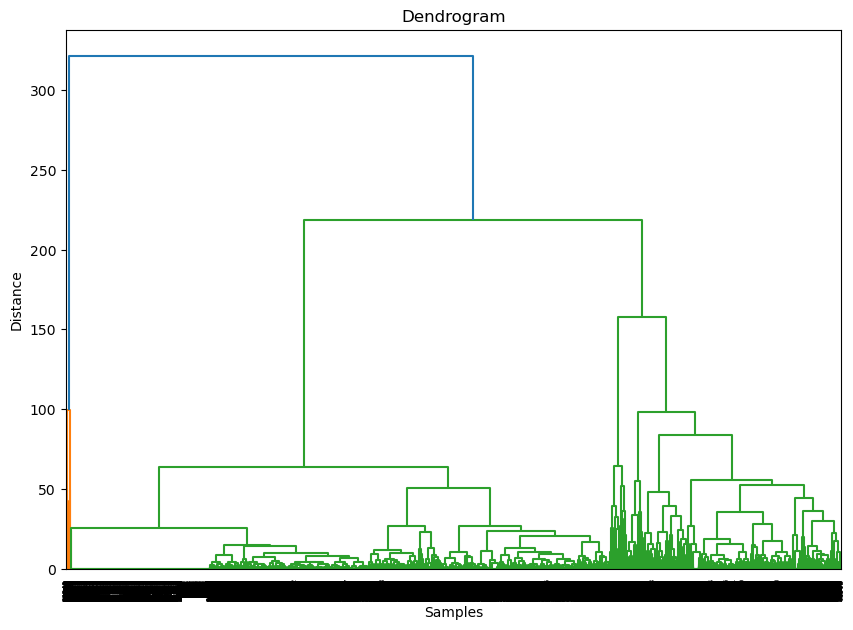

In [47]:
Z = linkage(clustering_df_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Analisando o dendograma, identificamos 3 clusters
- Avaliações altas
- Avaliações moderadas
- Avaliações baixas

In [48]:
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agglomerative.fit_predict(clustering_df_scaled)

clustering_df['Cluster'] = clusters

print(clustering_df.head())

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.77                       4.65                   4.83   
1                    4.70                       4.79                   4.81   
2                    4.93                       4.93                   4.97   
3                    3.88                       4.25                   4.69   
4                    4.72                       4.46                   4.83   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.91                    4.77                 4.67   
1                         4.92                    4.84                 4.60   
2                         4.95                    4.94                 4.89   
3                         4.56                    4.44                 4.38   
4                         4.77                    4.83                 4.59   

   Cluster  
0        0  
1        0  
2        2 

/tmp/ipykernel_460257/3322567400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['Cluster'] = clusters


In [53]:
cluster_means = clustering_df.groupby('Cluster').mean()

cluster_means_df = cluster_means.reset_index()
cluster_means_df


,Cluster,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0,4.559034,4.445951,4.741513,4.710767,4.745342,4.394226
1,1,2.114176,2.186154,2.400110,2.163077,2.892967,1.854560
2,2,4.936222,4.899147,4.967388,4.962800,4.927174,4.862541


In [54]:
cluster_counts = clustering_df['Cluster'].value_counts().reset_index()

cluster_counts.columns = ['Cluster', 'Count']

print("Cluster Counts:")
print(cluster_counts)


Cluster Counts:
   Cluster  Count
0        2  17884
1        0   7652
2        1    182


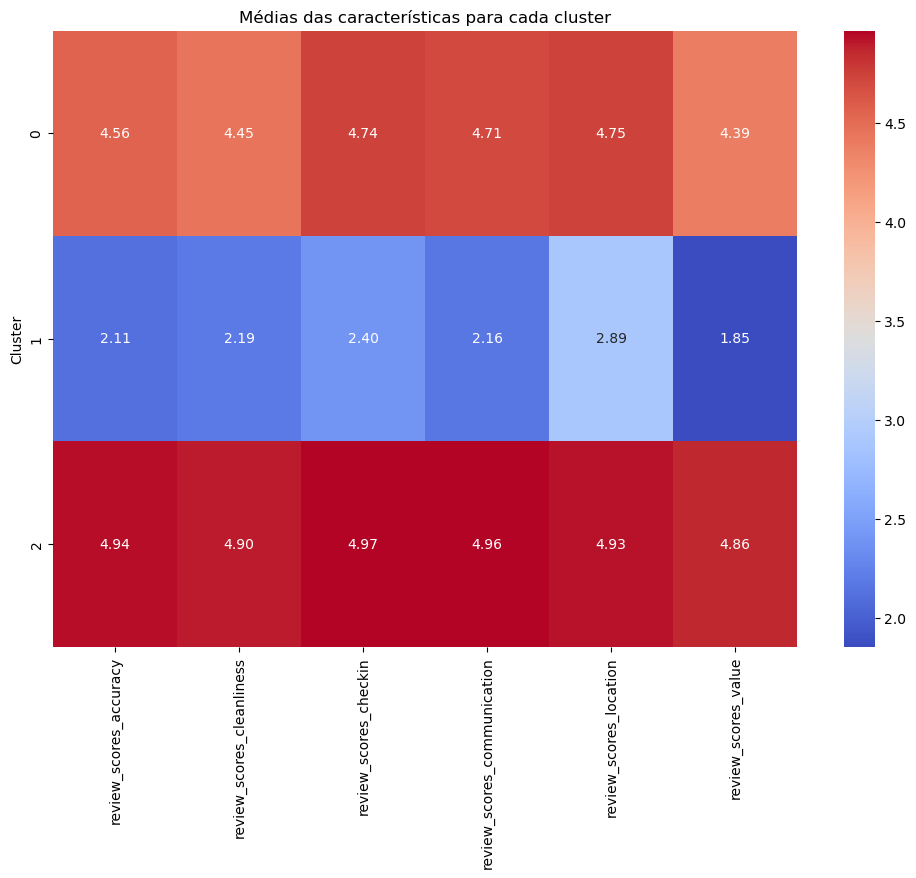

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Médias das características para cada cluster')
plt.show()
